# Proyek Analisis Data: E-Commerce public
- Kelompok : **KERAS**
- Anggota : </br>
10122292 - Wildan Mujjahid R</br>
10122293 - Imat Imansyah</br>
10122294 - Putri Aprilia</br>
10122304 - Hilman Fauzi M</br>
10122305 - Dicky Bariyadi S 

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1 (10122292 - Wildan Mujjahid R)** <br>
  `Identifikasi 5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah. Selanjutnya, jelaskan bagaimana tren penjualan untuk 5 kategori teratas produk tersebut dalam beberapa tahun terakhir, apakah menunjukkan peningkatan, penurunan, atau stabil dalam jumlah penjualan?`
- **Pertanyaan 2 (10122293 - Imat Imansyah)** <br>
  `Grafik pertumbuhan penjualan (%), kapan mengalami kenaikan dan penurunan`
- **Pertanyaan 3 (10122294 - Putri Aprilia)** <br>
  `Berapa perbandingan jumlah pesanan yang dikirim tepat waktu dan pesanan yang dikirim tidak tepat waktu pada tahun 2018?`
- **Pertanyaan 4 (10122304 - Hilman Fauzi M)** <br>
  `Kota dengan Rating tertinggi dan terendah berdasarkan jumlah penjualan atau ulasan`
- **Pertanyaan 5 (10122305 - Dicky Bariyadi S)** <br>
  `Top 5 customer terbanyak dan berasal dari kota mana?`

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
missing_value_format = ['N.A', 'na', 'n.a.','n/a','?','-']

## Data Wrangling

### Gathering Data

**CUSTOMERS DATASET**

In [3]:
#Customers Dataset
customers_dataset_df = pd.read_csv("./E-Commerce Public Dataset/customers_dataset.csv", na_values = missing_value_format)
customers_dataset_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**GEOLOCATION DATASET**

In [4]:
#Geolocation Dataset
geolocation_dataset_df = pd.read_csv("./E-Commerce Public Dataset/geolocation_dataset.csv", na_values = missing_value_format)
geolocation_dataset_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**ORDER ITEMS DATASET**

In [5]:
#Order Items Dataset
order_items_dataset_df = pd.read_csv("./E-Commerce Public Dataset/order_items_dataset.csv", na_values = missing_value_format)
order_items_dataset_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**ORDER PAYMENTS DATASET**

In [6]:
#Order Payments Dataset
order_payments_dataset_df = pd.read_csv("./E-Commerce Public Dataset/order_payments_dataset.csv", na_values = missing_value_format)
order_payments_dataset_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**ORDER REVIEWS DATASET**

In [7]:
#Order Reviews Dataset
order_reviews_dataset_df = pd.read_csv("./E-Commerce Public Dataset/order_reviews_dataset.csv", na_values = missing_value_format)
order_reviews_dataset_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**ORDERS DATASET**

In [8]:
#Orders Dataset
orders_dataset_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv", na_values = missing_value_format)
orders_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**PRODUCT CATEGORY NAME TRANSLATION**

In [9]:
#Product Category Name Translation
product_category_name_translation_df = pd.read_csv("./E-Commerce Public Dataset/product_category_name_translation.csv", na_values = missing_value_format)
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**PRODUCTS DATASET**

In [10]:
#Products Dataset
products_dataset_df = pd.read_csv("./E-Commerce Public Dataset/products_dataset.csv", na_values = missing_value_format)
products_dataset_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**SELLERS DATASET**

In [11]:
#Sellers Dataset
sellers_dataset_df = pd.read_csv("./E-Commerce Public Dataset/sellers_dataset.csv", na_values = missing_value_format)
sellers_dataset_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### `ORDERS DATASET`

In [12]:
orders_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
print("Jumlah Duplikasi :",orders_dataset_df.duplicated().sum())

Jumlah Duplikasi : 0


In [15]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### `CUSTOMERS DATASET`

In [16]:
#Cek Missing Values
customers_dataset_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [17]:
customers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [18]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())
customers_dataset_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### `ORDER REVIEWS DATASET`

In [19]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11566 non-null  object
 4   review_comment_message   40971 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [20]:
print("Jumlah Duplikasi : ",order_reviews_dataset_df.duplicated().sum())

Jumlah Duplikasi :  0


In [21]:
order_reviews_dataset_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87658
review_comment_message     58253
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [22]:
order_reviews_dataset_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### `ORDER ITEMS DATASET`

In [23]:
order_items_dataset_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [24]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [25]:
print("Jumlah Duplikasi : ",order_items_dataset_df.duplicated().sum())

Jumlah Duplikasi :  0


In [26]:
order_items_dataset_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### `SELLER DATASET`

In [27]:
sellers_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [28]:
sellers_dataset_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [29]:
print("Jumlah Duplikasi :",sellers_dataset_df.duplicated().sum())

Jumlah Duplikasi : 0


In [30]:
sellers_dataset_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### `PRODUCT DATASET`

In [31]:
# Mengecek missing Values
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [32]:
# Mengecek Data Duplikat
print('jumlah duplikasi data :',products_dataset_df.duplicated().sum())

jumlah duplikasi data : 0


In [33]:
products_dataset_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

#### `KATEGORI NAME TRANSLATION DATASET`

In [34]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [35]:
print('jumlah duplikasi data :',product_category_name_translation_df.duplicated().sum())

jumlah duplikasi data : 0


In [36]:
product_category_name_translation_df.dtypes

product_category_name            object
product_category_name_english    object
dtype: object

---

---

### Cleaning Data

#### Cleaning Table `customers_dataset_df`

##### Duplicate data

In [37]:
print("Jumlah duplikasi: ", customers_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing values

In [38]:
customers_dataset_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

#### Cleaning Table `order_items_dataset_df`

In [39]:
order_items_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [40]:
order_items_dataset_df['shipping_limit_date'] = pd.to_datetime(order_items_dataset_df['shipping_limit_date'])#, format= '%Y-%m-%d %X') 

In [41]:
order_items_dataset_df.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

##### Inaccurate values

In [42]:
customers_dataset_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Cleaning Table `order_reviews_dataset_df`

##### Missing values

In [43]:
order_reviews_dataset_df[order_reviews_dataset_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [44]:
order_reviews_dataset_df[order_reviews_dataset_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [45]:
order_reviews_dataset_df.fillna(value='No Comments',inplace = True)
order_reviews_dataset_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Comments,No Comments,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Comments,No Comments,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Comments,No Comments,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Comments,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Comments,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,No Comments,No Comments,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,No Comments,No Comments,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,No Comments,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,No Comments,No Comments,2018-07-01 00:00:00,2018-07-02 12:59:13


In [46]:
order_reviews_dataset_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### inaccurate type

In [47]:
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [48]:
# DateTimeColumns = ['review_creation_date','review_answer_timestamp'],

# for column in DateTimeColumns:
#     order_reviews_dataset_df[DateTimeColumns] = pd.to_datetime(order_reviews_dataset_df[DateTimeColumns],format = '%Y-%m-%d %X
order_reviews_dataset_df['review_creation_date'] = pd.to_datetime(order_reviews_dataset_df['review_creation_date'],format = '%Y-%m-%d %X')
order_reviews_dataset_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_dataset_df['review_answer_timestamp'],format = '%Y-%m-%d %X')
order_reviews_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


#### Cleaning Table `orders_dataset_df`

##### Duplicate Data

In [49]:
print("Jumlah duplikasi: ", orders_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


##### Missing Values

In [50]:
orders_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [51]:
orders_dataset_df["order_approved_at"].fillna(value="No Date or Related Date", inplace=True)
orders_dataset_df["order_delivered_carrier_date"].fillna(value="No Date or Related Date", inplace=True)
orders_dataset_df["order_delivered_customer_date"].fillna(value="No Date or Related Date", inplace=True)

In [52]:
orders_dataset_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

##### Inaccurate Values

In [53]:
orders_dataset_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90734,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,No Date or Related Date,No Date or Related Date,No Date or Related Date,2017-12-20 00:00:00
freq,1,1,96478,3,160,1783,2965,522


#### Cleaning Table `seller_city`

##### Inaccurate values

In [54]:
sellers_dataset_df.sort_values('seller_city',inplace=True)
sellers_dataset_df.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
517,ceb7b4fb9401cd378de7886317ad1b47,22790,04482255,RJ


In [55]:
sellers_dataset_df['seller_city']= sellers_dataset_df['seller_city'].replace(to_replace = '04482255', value = 'rio de janeiro')
sellers_dataset_df.head(1)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
517,ceb7b4fb9401cd378de7886317ad1b47,22790,rio de janeiro,RJ


In [56]:
sellers_dataset_df.sort_values('seller_city')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
2067,c8143b3069f6746a77421b5ce30a450c,75345,abadia de goias,GO
2153,2f4b9d112bfa44a214bc6cef085d17c8,29600,afonso claudio,ES
2589,3a52d63a8f9daf5a28f3626d7eb9bd28,71900,aguas claras df,SP
2115,717b78b0950b51ed00b1471d858b0edc,18220,alambari,SP
1812,0aa124728afc1131dff5655f4c6f487b,37135,alfenas,MG
...,...,...,...,...
1678,94e93ce877be27a515118dbfd2c2be41,15502,votuporanga,SP
746,9da1ca0bef29ee170e541927a5aeabdc,15500,votuporanga,SP
2472,abbf6046bbdf1028606a5bc7f00c99e7,89820,xanxere,SC
2730,ca5832c6960267b71041f74bb39e8b12,89820,xanxere,SC


#### Cleaning Table `products_dataset_df`

**Handling missing Values**

In [57]:
products_dataset_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [132]:
# menangani missing values dengan method ffill (mengisi nilai yang hilang dengan nilai dari baris sebelumnya)

products_dataset_df['product_weight_g'].fillna(method='ffill', inplace=True)
products_dataset_df['product_length_cm'].fillna(method='ffill', inplace=True)
products_dataset_df['product_height_cm'].fillna(method='ffill', inplace=True)
products_dataset_df['product_width_cm'].fillna(method='ffill', inplace=True)
products_dataset_df['product_name_lenght'].fillna(method='ffill', inplace=True)
products_dataset_df['product_description_lenght'].fillna(method='ffill', inplace=True)
products_dataset_df['product_photos_qty'].fillna(method='ffill', inplace=True) 

C:\Users\dicky\AppData\Local\Temp\ipykernel_15600\559351201.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_dataset_df['product_weight_g'].fillna(method='ffill', inplace=True)
C:\Users\dicky\AppData\Local\Temp\ipykernel_15600\559351201.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_dataset_df['product_length_cm'].fillna(method='ffill', inplace=True)
C:\Users\dicky\AppData\Local\Temp\ipykernel_15600\559351201.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  products_dataset_df['product_height_cm'].fillna(method='ffill', inplace=True)
C:\Users\dicky\AppData\Local\Temp\ipykernel_15600\559351201.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use o

In [59]:
# manangani missing Values dengan modus

mode_category = products_dataset_df['product_category_name'].mode()[0]
products_dataset_df['product_category_name'].fillna(value=mode_category, inplace=True)

In [60]:
products_dataset_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

#### Explore tabel `df_produk`, `df_order_items` & `df_kategori`

**Merge `df_produk` & `df_order_item`**

In [61]:
kategori_info = pd.merge(products_dataset_df[['product_id', 'product_category_name']],order_items_dataset_df[['order_item_id','product_id','shipping_limit_date']], on='product_id', how='inner')

In [62]:
kategori_info

,product_id,product_category_name,order_item_id,shipping_limit_date
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1,2018-04-30 17:33:54
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1,2018-02-06 19:11:15
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1,2018-07-11 21:30:20
3,cef67bcfe19066a932b7673e239eb23d,bebes,1,2018-08-07 09:10:13
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,1,2018-04-17 01:30:23
...,...,...,...,...
112645,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2,2018-01-10 03:32:09
112646,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,1,2018-03-14 02:30:48
112647,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2,2018-03-14 02:30:48
112648,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,3,2018-03-14 02:30:48


**Merge `kategori_info` & `df_kategori`**

In [63]:
kategori_info = pd.merge(kategori_info,product_category_name_translation_df[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')

In [64]:
kategori_info.head()

,product_id,product_category_name,order_item_id,shipping_limit_date,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1,2018-04-30 17:33:54,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,1,2017-11-23 21:31:31,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,1,2017-12-14 16:33:14,perfumery
3,0d009643171aee696f4733340bc2fdd0,perfumaria,1,2017-08-03 09:50:14,perfumery
4,0d009643171aee696f4733340bc2fdd0,perfumaria,1,2018-05-30 10:38:35,perfumery


In [65]:
# Menghapus kategori yang bahasa brazil
kategori_info = kategori_info.drop('product_category_name',axis=1)

# Mengubah nama kolom kategori dan order item id
kategori_info = kategori_info.rename(columns={'product_category_name_english': 'product_category'})
kategori_info = kategori_info.rename(columns={'order_item_id': 'jumlah_terjual'})

kategori_info.head()

,product_id,jumlah_terjual,shipping_limit_date,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,1,2018-04-30 17:33:54,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,1,2017-11-23 21:31:31,perfumery
2,6a2fb4dd53d2cdb88e0432f1284a004c,1,2017-12-14 16:33:14,perfumery
3,0d009643171aee696f4733340bc2fdd0,1,2017-08-03 09:50:14,perfumery
4,0d009643171aee696f4733340bc2fdd0,1,2018-05-30 10:38:35,perfumery


**Menentukan kategori dengan 5 penjualan teratas dan 5 penjualan terbawah**

In [66]:
count_kategori = kategori_info['product_category'].value_counts()
count_kategori

product_category
bed_bath_table               12718
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
la_cuisine                      14
cds_dvds_musicals               14
fashion_childrens_clothes        8
security_and_services            2
Name: count, Length: 71, dtype: int64

In [67]:
# Mencari 5 kategori teratas
kategori_head = count_kategori.head(5)
pd.DataFrame(kategori_head) 

,count
product_category,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [68]:
# Mencari 5 Kategori dengan penjualan paling sedikit
kategori_tail = count_kategori.tail(5)
pd.DataFrame(kategori_tail)

,count
product_category,
arts_and_craftmanship,24
la_cuisine,14
cds_dvds_musicals,14
fashion_childrens_clothes,8
security_and_services,2


**Menentukan trend penjualan kategori terlaris**

In [69]:
top_five = count_kategori.head(5)
top_five = pd.DataFrame(top_five)
top_five

,count
product_category,
bed_bath_table,12718
health_beauty,9670
sports_leisure,8641
furniture_decor,8334
computers_accessories,7827


In [70]:
# Filter data untuk kategori paling banyak terjual

kategori_terlaris_1 = top_five.index[0]
kategori_terlaris_1 = kategori_info[kategori_info['product_category'] == kategori_terlaris_1]

kategori_terlaris_2 = top_five.index[1]
kategori_terlaris_2 = kategori_info[kategori_info['product_category'] == kategori_terlaris_2]

kategori_terlaris_3 = top_five.index[2]
kategori_terlaris_3 = kategori_info[kategori_info['product_category'] == kategori_terlaris_3]

kategori_terlaris_4 = top_five.index[3]
kategori_terlaris_4 = kategori_info[kategori_info['product_category'] == kategori_terlaris_4]

kategori_terlaris_5 = top_five.index[4]
kategori_terlaris_5 = kategori_info[kategori_info['product_category'] == kategori_terlaris_5]

In [71]:
kategori_terlaris_1

,product_id,jumlah_terjual,shipping_limit_date,product_category
39996,14aa47b7fe5c25522b47b4b29c98dcb9,1,2018-02-09 12:29:52,bed_bath_table
39997,14aa47b7fe5c25522b47b4b29c98dcb9,2,2018-02-09 12:29:52,bed_bath_table
39998,14aa47b7fe5c25522b47b4b29c98dcb9,1,2018-06-08 17:31:20,bed_bath_table
39999,14aa47b7fe5c25522b47b4b29c98dcb9,1,2018-08-08 15:30:17,bed_bath_table
40000,f53103a77d9cf245e579ea37e5ec51f0,1,2018-06-29 14:57:15,bed_bath_table
...,...,...,...,...
52709,9a7c6041fa9592d9d9ef6cfe62a71f8c,1,2018-06-20 18:58:12,bed_bath_table
52710,9a7c6041fa9592d9d9ef6cfe62a71f8c,1,2018-06-28 17:18:27,bed_bath_table
52711,9a7c6041fa9592d9d9ef6cfe62a71f8c,1,2017-08-25 15:50:13,bed_bath_table
52712,9a7c6041fa9592d9d9ef6cfe62a71f8c,1,2018-01-16 21:31:29,bed_bath_table


In [72]:
kategori_terlaris_1.dtypes

product_id                     object
jumlah_terjual                  int64
shipping_limit_date    datetime64[ns]
product_category               object
dtype: object

In [133]:
# Buat kolom 'month_year' untuk menyimpan bulan dan tahun menggunakan .loc[]

kategori_terlaris_1.loc[:, 'year'] = kategori_terlaris_1['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_2.loc[:, 'year'] = kategori_terlaris_2['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_3.loc[:, 'year'] = kategori_terlaris_3['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_4.loc[:, 'year'] = kategori_terlaris_4['shipping_limit_date'].dt.to_period('Y')
kategori_terlaris_5.loc[:, 'year'] = kategori_terlaris_5['shipping_limit_date'].dt.to_period('Y')

In [74]:
# trend penjualan top 1 ketegori

sales_kategory1_trend = kategori_terlaris_1.groupby('year')['jumlah_terjual'].count()
sales_kategory1_trend

year
2016      10
2017    5991
2018    6717
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [75]:
# trend penjualan top 2 kategori

sales_kategory2_trend = kategori_terlaris_2.groupby('year')['jumlah_terjual'].count()
sales_kategory2_trend

year
2016      51
2017    3590
2018    6029
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [76]:
# trend penjualan top 3 kategori

sales_kategory3_trend = kategori_terlaris_3.groupby('year')['jumlah_terjual'].count()
sales_kategory3_trend

year
2016      19
2017    4038
2018    4584
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [77]:
# trend penjualan top 4 kategori

sales_kategory4_trend = kategori_terlaris_4.groupby('year')['jumlah_terjual'].count()
sales_kategory4_trend

year
2016      69
2017    4058
2018    4207
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

In [78]:
# trend penjualan top 5 kategori

sales_kategory5_trend = kategori_terlaris_5.groupby('year')['jumlah_terjual'].count()
sales_kategory5_trend

year
2016      21
2017    3042
2018    4764
Freq: A-DEC, Name: jumlah_terjual, dtype: int64

#### Explore tabel `df_order_items`, `df_orders`

In [79]:
growth_month = pd.merge(order_items_dataset_df, orders_dataset_df, on= 'order_id', how= 'inner')
growth_month = growth_month.loc[:, ['order_item_id', 'order_purchase_timestamp', 'price']] 
growth_month

,order_item_id,order_purchase_timestamp,price
0,1,2017-09-13 08:59:02,58.90
1,1,2017-04-26 10:53:06,239.90
2,1,2018-01-14 14:33:31,199.00
3,1,2018-08-08 10:00:35,12.99
4,1,2017-02-04 13:57:51,199.90
...,...,...,...
112645,1,2018-04-23 13:57:06,299.99
112646,1,2018-07-14 10:26:46,350.00
112647,1,2017-10-23 17:07:56,99.90
112648,1,2017-08-14 23:02:59,55.99


In [80]:
display(growth_month.sum())

order_item_id                                                          134936
order_purchase_timestamp    2017-09-13 08:59:022017-04-26 10:53:062018-01-...
price                                                              13591643.7
dtype: object

In [81]:
growth_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   order_item_id             112650 non-null  int64  
 1   order_purchase_timestamp  112650 non-null  object 
 2   price                     112650 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.6+ MB


In [82]:
display(growth_month.isnull().sum())

order_item_id               0
order_purchase_timestamp    0
price                       0
dtype: int64

In [83]:
growth_month['order_purchase_timestamp'] = pd.to_datetime(growth_month['order_purchase_timestamp'])
growth_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_item_id             112650 non-null  int64         
 1   order_purchase_timestamp  112650 non-null  datetime64[ns]
 2   price                     112650 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.6 MB


In [84]:
growth_month.sort_values(by='order_purchase_timestamp', inplace=True)
growth_month

,order_item_id,order_purchase_timestamp,price
20265,1,2016-09-04 21:15:19,39.99
20266,2,2016-09-04 21:15:19,32.90
101394,1,2016-09-05 00:15:34,59.50
84389,1,2016-09-15 12:16:38,44.99
84391,3,2016-09-15 12:16:38,44.99
...,...,...,...
4925,2,2018-08-29 14:18:23,209.00
9829,1,2018-08-29 14:18:28,45.90
1722,1,2018-08-29 14:52:00,24.90
23530,1,2018-08-29 15:00:37,84.99


In [85]:
growth_month_grouped = growth_month.groupby(growth_month['order_purchase_timestamp'].dt.to_period('M'))
growth_month_result = growth_month_grouped.mean()
growth_month

,order_item_id,order_purchase_timestamp,price
20265,1,2016-09-04 21:15:19,39.99
20266,2,2016-09-04 21:15:19,32.90
101394,1,2016-09-05 00:15:34,59.50
84389,1,2016-09-15 12:16:38,44.99
84391,3,2016-09-15 12:16:38,44.99
...,...,...,...
4925,2,2018-08-29 14:18:23,209.00
9829,1,2018-08-29 14:18:28,45.90
1722,1,2018-08-29 14:52:00,24.90
23530,1,2018-08-29 15:00:37,84.99


In [86]:
growth_month['total_price'] = growth_month['price'] * growth_month['order_item_id']
growth_month

,order_item_id,order_purchase_timestamp,price,total_price
20265,1,2016-09-04 21:15:19,39.99,39.99
20266,2,2016-09-04 21:15:19,32.90,65.80
101394,1,2016-09-05 00:15:34,59.50,59.50
84389,1,2016-09-15 12:16:38,44.99,44.99
84391,3,2016-09-15 12:16:38,44.99,134.97
...,...,...,...,...
4925,2,2018-08-29 14:18:23,209.00,418.00
9829,1,2018-08-29 14:18:28,45.90,45.90
1722,1,2018-08-29 14:52:00,24.90,24.90
23530,1,2018-08-29 15:00:37,84.99,84.99


In [87]:
growth_month_grouped = growth_month.groupby('order_item_id')
growth_month_result = growth_month_grouped['total_price'].sum()
growth_month

,order_item_id,order_purchase_timestamp,price,total_price
20265,1,2016-09-04 21:15:19,39.99,39.99
20266,2,2016-09-04 21:15:19,32.90,65.80
101394,1,2016-09-05 00:15:34,59.50,59.50
84389,1,2016-09-15 12:16:38,44.99,44.99
84391,3,2016-09-15 12:16:38,44.99,134.97
...,...,...,...,...
4925,2,2018-08-29 14:18:23,209.00,418.00
9829,1,2018-08-29 14:18:28,45.90,45.90
1722,1,2018-08-29 14:52:00,24.90,24.90
23530,1,2018-08-29 15:00:37,84.99,84.99


In [88]:
growth_month['order_purchase_timestamp'] = pd.to_datetime(growth_month['order_purchase_timestamp'])
growth_month.set_index('order_purchase_timestamp', inplace=True)
growth_month_resampled = growth_month.resample('M').agg({'order_item_id': 'sum', 'price': 'sum'}).reset_index()
print(growth_month_resampled)

   order_purchase_timestamp  order_item_id       price
0                2016-09-30             10      267.36
1                2016-10-31            457    49507.66
2                2016-11-30              0        0.00
3                2016-12-31              1       10.90
4                2017-01-31           1318   120312.87
5                2017-02-28           2252   247303.02
6                2017-03-31           3515   374344.30
7                2017-04-30           3094   359927.23
8                2017-05-31           4802   506071.14
9                2017-06-30           4094   433038.60
10               2017-07-31           5470   498031.48
11               2017-08-31           5947   573971.68
12               2017-09-30           5742   624401.69
13               2017-10-31           6614   664219.43
14               2017-11-30          10630  1010271.37
15               2017-12-31           7351   743914.17
16               2018-01-31           9748   950030.36
17        

In [89]:
orders_dataset_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv", na_values = missing_value_format)
filter = orders_dataset_df[(orders_dataset_df['order_purchase_timestamp'] >= "2018-01-01") & (orders_dataset_df['order_purchase_timestamp'] < "2019-01-01") ]
filter2 = filter[[('order_purchase_timestamp')]]

jumlah = len(filter.axes[0])
jumlah2 = len(filter2.axes[0])
print("")
print("Transaksi Dalam 1 Tahun Terakhir")
display(filter2)


Transaksi Dalam 1 Tahun Terakhir


,order_purchase_timestamp
1,2018-07-24 20:41:37
2,2018-08-08 08:38:49
4,2018-02-13 21:18:39
12,2018-06-07 10:06:19
13,2018-07-25 17:44:10
...,...
99428,2018-06-22 20:53:29
99430,2018-03-04 22:48:38
99437,2018-02-06 12:58:58
99439,2018-01-08 21:28:27


#### Explore tabel `df_orders`

In [90]:
orders_dataset_df = pd.read_csv("./E-Commerce Public Dataset/orders_dataset.csv", na_values = missing_value_format)

In [91]:
filter = orders_dataset_df[(orders_dataset_df['order_status'] == "delivered") & (orders_dataset_df['order_delivered_customer_date'] > "2017-12-31") & (orders_dataset_df['order_delivered_customer_date'] < "2018-12-01")]
filter2 = filter[[('order_delivered_customer_date'),('order_estimated_delivery_date')]]
filter3 = filter2[(filter2['order_delivered_customer_date'] > filter2['order_estimated_delivery_date'])]
filter4 = filter2[(filter2['order_delivered_customer_date'] < filter2['order_estimated_delivery_date'])]

In [92]:
jumlah = len(filter3.axes[0])
jumlah2 = len(filter4.axes[0])

In [93]:
print("")
print("Data Pengiriman Tepat Waktu")
print(filter4)


Data Pengiriman Tepat Waktu
      order_delivered_customer_date order_estimated_delivery_date
1               2018-08-07 15:27:45           2018-08-13 00:00:00
2               2018-08-17 18:06:29           2018-09-04 00:00:00
4               2018-02-16 18:17:02           2018-02-26 00:00:00
12              2018-06-19 12:05:52           2018-07-18 00:00:00
13              2018-07-30 15:52:25           2018-08-08 00:00:00
...                             ...                           ...
99428           2018-07-03 19:48:54           2018-07-23 00:00:00
99430           2018-03-13 18:54:32           2018-03-26 00:00:00
99437           2018-02-28 17:37:56           2018-03-02 00:00:00
99439           2018-01-25 23:32:54           2018-02-15 00:00:00
99440           2018-03-16 13:08:30           2018-04-03 00:00:00

[49603 rows x 2 columns]


In [94]:
print("")
print("Data Pengiriman Telat")
print(filter3)


Data Pengiriman Telat
      order_delivered_customer_date order_estimated_delivery_date
25              2018-03-21 22:03:54           2018-03-12 00:00:00
35              2018-03-20 00:59:25           2018-03-20 00:00:00
57              2018-04-03 13:28:46           2018-04-02 00:00:00
102             2018-08-03 19:28:47           2018-08-02 00:00:00
110             2018-01-23 21:38:52           2017-12-22 00:00:00
...                             ...                           ...
99328           2018-04-26 12:54:39           2018-04-25 00:00:00
99396           2018-08-21 00:03:26           2018-08-16 00:00:00
99397           2018-04-05 19:59:49           2018-04-02 00:00:00
99425           2018-04-11 00:48:31           2018-04-09 00:00:00
99432           2018-01-26 15:45:14           2018-01-18 00:00:00

[5675 rows x 2 columns]


#### Explore tabel `df_order_items`

In [95]:
order_items_dataset_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
51273,749301535fc8f3a2576d3c52fcbc886c,1,ead3077a141a9c800d6a4bb9d0d415b6,b2479f944e1b90cf8a5de1bbfde284d6,2018-05-11 16:12:20,24.99,12.79
5832,0d2ab5712ce82b9059da04a32ded871c,1,b906473f6ad88809cd95a1e7e77cd91f,6d66611d7c44cc30ce351abc49a68421,2018-02-23 09:26:56,129.90,13.93
75942,ace9787c2536f487f1491bac9707fd67,1,d7e446a8f36339b1a9d059d1237159c1,f76a3b1349b6df1ee875d1f3fa4340f0,2018-04-18 04:29:33,199.90,14.30
111039,fc473b8de8c0167920c1a693670d4c41,1,96ce4ff64224301c9da1dd92fa9551fa,febab0275244b9a49a623f0bd613ca2f,2018-03-23 13:49:26,142.00,97.32
88477,c8f14c24a3948d96d4022f50b14a0034,1,a8d2c5e8f29550a539f377d977f10a52,7e1fb0a3ebfb01ffb3a7dae98bf3238d,2018-04-12 12:08:59,88.00,22.33


In [96]:
order_items_dataset_df.describe(include = 'all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [97]:
order_items_dataset_df.groupby('order_item_id').agg({
    'order_id' : 'nunique',
    'seller_id' : 'nunique'
})

,order_id,seller_id
order_item_id,,
1,98666,3088
2,9803,1531
3,2287,730
4,965,431
5,460,262
6,256,163
7,58,43
8,36,25
9,28,19


#### Explore tabel `df_order_reviews`

In [98]:
order_reviews_dataset_df.describe(include = 'all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4526,36158,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Comments,No Comments,NaN,NaN
freq,3,3,NaN,87658,58253,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [99]:
order_reviews_dataset_df.groupby('review_score').agg({
    'order_id' : 'count'
})

,order_id
review_score,
1,11424
2,3151
3,8179
4,19142
5,57328


#### Explore tabel `df_sellers_`

In [100]:
sellers_dataset_df.sample(8)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
1339,be7a093e5b4d147b36b72bb1f9e415e5,85900,toledo,PR
683,24c1de8d9551c0b4fbc53317d53efda8,58385,serra redonda,PB
1062,271c58a1d139c45eaf3316107c6d3a3b,3632,sao paulo,SP
129,784ba75dd9d20200c4caed3d7a77141a,1040,sao paulo,SP
1295,1d29dfba02015238dfbe2449a5eaa361,36576,vicosa,MG
2152,6fc26fe110feebd80a433e1f012a84f9,15601,fernandopolis,SP
2125,8b11118053756a9a2932f447e11fc1b5,17350,igaracu do tiete,SP
1639,417a1e6c7321084d2a0ae0d023cfad93,95885,imigrante,RS


In [101]:
sellers_dataset_df.describe(include = 'all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,610,23
top,ceb7b4fb9401cd378de7886317ad1b47,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [102]:
sellers_dataset_df.groupby('seller_state').agg({
    'seller_id' : 'count'
})

,seller_id
seller_state,
AC,1
AM,1
BA,19
CE,13
DF,30
ES,23
GO,40
MA,1
MG,244


#### Explore tabel `df_order_items` & `df_order_reviews`

In [103]:
orders_df = pd.merge(
    left=order_items_dataset_df,
    right=order_reviews_dataset_df,
    left_on = 'order_id',
    right_on= 'order_id'
)
orders_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,97ca439bc427b48bc1cd7177abe71365,5,No Comments,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,7b07bacd811c4117b742569b04ce3580,4,No Comments,No Comments,2017-05-13,2017-05-15 11:34:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,0c5b33dea94867d1ac402749e5438e8b,5,No Comments,Chegou antes do prazo previsto e o produto sur...,2018-01-23,2018-01-23 16:06:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,f4028d019cb58564807486a6aaf33817,4,No Comments,No Comments,2018-08-15,2018-08-15 16:39:01
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,940144190dcba6351888cafa43f3a3a5,5,No Comments,Gostei pois veio no prazo determinado .,2017-03-02,2017-03-03 10:54:59


In [104]:
orders_df.groupby(['order_id','seller_id']).review_id.count().sort_values(ascending = False)

order_id                          seller_id                       
8272b63d03f5f79c56e9e4120aec44ef  2709af9587499e95e803a6498a5a56e9    21
1b15974a0141d54e36626dca3fdc731a  8e6d7754bc7e0f22c96d255ebda59eba    20
5a3b1c29a49756e75f1ef513383c0c12  d2374cbcbb3ca4ab1086534108cc3ab7    18
9ef13efd6949e4573a18964dd1bbe7f5  0b36063d5818f81ccb94b54adfaebbf5    15
428a2f660dc84138d969ccd69a0ab6d5  f326006815956455b2859abd58fe7e39    15
                                                                      ..
59c153fdba2562afd8554a380231559e  cd06602b43d8800bd0afad514919d35c     1
59c134c32edc0046c31ad8bd6f521b61  dbb9b48c841a0e39e21f98e1a6b2ec3e     1
59c0d4b067270f98e28b82c5ce59db9c  17ca9b9e9b9ef8fdb529001b49ebb50f     1
59be4c2310298e01725dd55622c4f038  dd2bdf855a9172734fbc3744021ae9b9     1
fffe41c64501cc87c801fd61db3f6244  f7ccf836d21b2fb1de37564105216cc1     1
Name: review_id, Length: 99247, dtype: int64

In [105]:
orders_df.isna().sum()

order_id                   0
order_item_id              0
product_id                 0
seller_id                  0
shipping_limit_date        0
price                      0
freight_value              0
review_id                  0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Explore tabel `orders_df` & `df_sellers`

In [106]:
orders_sellers_df = pd.merge(
    left=orders_df,
    right=sellers_dataset_df,
    left_on="seller_id",
    right_on="seller_id"
)
orders_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,No Comments,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,27277,volta redonda,SP
1,0188777fe321843a18be24a6e9aa1e53,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,1fac9acb29e014e3b9b393d5c8505f99,5,No Comments,ÓTIMO,2017-07-29,2017-08-01 20:55:50,27277,volta redonda,SP
2,0191bbb5166d4b9a68df11797d5acfa9,1,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,2eab04a8f45efa131d44cf58b37ab595,5,No Comments,Recebi o patines em perfeitas condições bem an...,2017-08-25,2017-08-28 12:57:25,27277,volta redonda,SP
3,03054d8a8eefc2981cfad06f58e27979,1,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,9d0e152a1983460f059ddffcb8af03bb,5,No Comments,No Comments,2017-10-20,2017-10-20 23:45:27,27277,volta redonda,SP
4,0c325ea6925de749e1420be0cf43587c,1,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,f4fad24d4bb3462bab004be9a0b753f0,4,No Comments,"Atendimento excelente,o produto chegou antes d...",2017-07-11,2017-07-13 23:18:14,27277,volta redonda,SP


In [107]:
orders_sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112372 entries, 0 to 112371
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   order_id                 112372 non-null  object        
 1   order_item_id            112372 non-null  int64         
 2   product_id               112372 non-null  object        
 3   seller_id                112372 non-null  object        
 4   shipping_limit_date      112372 non-null  datetime64[ns]
 5   price                    112372 non-null  float64       
 6   freight_value            112372 non-null  float64       
 7   review_id                112372 non-null  object        
 8   review_score             112372 non-null  int64         
 9   review_comment_title     112372 non-null  object        
 10  review_comment_message   112372 non-null  object        
 11  review_creation_date     112372 non-null  datetime64[ns]
 12  review_answer_ti

In [108]:
orders_sellers_df.sort_values(by = 'review_score', ascending =False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,97ca439bc427b48bc1cd7177abe71365,5,No Comments,"Perfeito, produto entregue antes do combinado.",2017-09-21,2017-09-22 10:57:03,27277,volta redonda,SP
65201,ab9a3c29c4b67aaca311cad95058153a,1,f71973c922ccaab05514a36a8bc741b8,5dceca129747e92ff8ef7a997dc4f8ca,2017-05-17 14:10:18,109.9,21.42,f230b63fac0181e0aa39a44f6a90791c,5,No Comments,Comprei este produto adorei os benefícios que ...,2017-05-16,2017-05-18 22:50:30,13450,santa barbara d´oeste,SP
65212,b4089e5d326faccf865d5ab5463a22ce,1,0efb0a47500c44e05a5930cae12307d4,5dceca129747e92ff8ef7a997dc4f8ca,2018-02-01 18:30:25,299.9,53.29,f79e1ee49a80d9d132e33d0b3a498111,5,No Comments,"RECEBI ANTES DO PRAZO, O PRODUTO É EXATAMENTE ...",2018-01-26,2018-01-27 19:04:34,13450,santa barbara d´oeste,SP
65209,b23dfa1c97d08f8d2017e85dbdc5b1aa,1,6f790ed0f75949b7fa234ec087aed912,5dceca129747e92ff8ef7a997dc4f8ca,2017-02-01 17:05:18,669.0,41.00,a550516cf299801f549ba3d8a0c0aa07,5,No Comments,No Comments,2017-02-18,2017-02-18 13:27:27,13450,santa barbara d´oeste,SP
65208,b07bd6d2317297a22b80a9836b464d59,1,811c8bc1ddef7440e27dfb8cb536f334,5dceca129747e92ff8ef7a997dc4f8ca,2018-06-29 11:32:43,428.0,46.99,f061444920c42b63a1a97141431973e4,5,No Comments,No Comments,2018-07-05,2018-07-07 11:55:34,13450,santa barbara d´oeste,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76618,35a3d210c364e3747478f468b0547bb2,1,52a646aa308987e28c375b41081de428,430315b7bb4b6e4b3c978f9dfa9b0558,2018-05-02 18:10:04,29.0,18.23,c74e7e7e7df2d5b606f54836042b3e13,1,tranca moto,produto fraco,2018-05-08,2018-05-11 10:20:29,4857,sao paulo,SP
10868,3d76cc1cc5ebdd45a03c0b51f79d43b1,2,6fd82d8f842424334fedf31190e54d24,6560211a19b47992c3666cc44a7e94c0,2017-03-14 04:03:29,45.0,14.57,6b0fd9d7bea27ff9740eca8c6b94b179,1,No Comments,Não recebi o produto Relógio Feminino de Pulso...,2017-03-11,2017-03-12 13:57:04,5849,sao paulo,SP
60271,f0b3b8301161711933b5fa04d6191a0e,1,0a4093a4af429dc0a9334300e5c13ae5,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-15 16:48:15,29.9,18.23,af629ffeb2901420c78591a1504d89a8,1,No Comments,No Comments,2018-04-04,2018-04-04 16:17:01,13405,piracicaba,SP
20808,f3468d6a2c7586711e9952242898aad4,3,31a89a7044c5b133cf646404a4e86022,955fee9216a65b617aa5c0531780ce60,2018-05-17 20:56:02,150.0,17.64,c40a6b6e0181e5ec0d12cbc2e12c49d3,1,falta de produto e quebra,Faltou 1 produto e os que recebi 1 veio quebrado,2018-05-23,2018-05-23 22:23:00,4782,sao paulo,SP


In [109]:
orders_sellers_df.isna().sum()

order_id                   0
order_item_id              0
product_id                 0
seller_id                  0
shipping_limit_date        0
price                      0
freight_value              0
review_id                  0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
seller_zip_code_prefix     0
seller_city                0
seller_state               0
dtype: int64

In [110]:
counter = pd.DataFrame(orders_sellers_df.groupby('seller_city').agg({
    'review_score' : 'sum',
    'review_id' : 'count',
    'order_id'  : 'count'
}).sort_values('review_score',ascending=False))
counter

,review_score,review_id,order_id
seller_city,,,
sao paulo,111989,27862,27862
ibitinga,29567,7781,7781
curitiba,12820,3025,3025
santo andre,12284,3003,3003
belo horizonte,10774,2578,2578
...,...,...,...
carmo da mata,1,1,1
pirassununga,1,1,1
rio branco,1,1,1


In [111]:
rating_counter = pd.DataFrame(orders_sellers_df.groupby('seller_city').review_score.sum().sort_values(ascending=False))
valid_rating_counter = rating_counter.drop(index=[row for row in rating_counter.index if 5000 > rating_counter.loc[row, 'review_score']])
valid_rating_counter


,review_score
seller_city,
sao paulo,111989
ibitinga,29567
curitiba,12820
santo andre,12284
belo horizonte,10774
sao jose do rio preto,10251
rio de janeiro,9810
guarulhos,9641
maringa,8819


In [112]:
review_counter = pd.DataFrame(orders_sellers_df.groupby('seller_city').review_id.count().sort_values(ascending=False))
valid_review_counter = review_counter.drop(index=[row for row in review_counter.index if 1200 > review_counter.loc[row, 'review_id']])
valid_review_counter

,review_id
seller_city,
sao paulo,27862
ibitinga,7781
curitiba,3025
santo andre,3003
belo horizonte,2578
sao jose do rio preto,2570
rio de janeiro,2431
guarulhos,2365
ribeirao preto,2263


In [113]:
ratio = valid_rating_counter / valid_review_counter.values
overall = pd.DataFrame(ratio.drop(index=[row for row in ratio.index if 4 > ratio.loc[row, 'review_score']]))
overall

,review_score
seller_city,
sao paulo,4.019417
curitiba,4.238017
santo andre,4.090576
belo horizonte,4.179209
rio de janeiro,4.035376
guarulhos,4.076533
piracicaba,4.035417
itaquaquecetuba,4.141697
salto,4.135784


In [114]:
worstCity = pd.DataFrame(counter.drop(index=[row for row in counter.index if 1 < counter.loc[row, 'review_score'] and counter.loc[row, 'review_id'] and counter.loc[row, 'order_id']]))
worstCity


,review_score,review_id,order_id
seller_city,,,
aguas claras df,1,1,1
medianeira,1,1,1
marapoama,1,1,1
macatuba,1,1,1
cordilheira alta,1,1,1
orleans,1,1,1
ipua,1,1,1
carmo da mata,1,1,1
pirassununga,1,1,1


#### Explore tabel `df_customers`

In [115]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [116]:
customers_dataset_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25442,fbd14093f9374d4f70e80ee9cbccd5ca,86669cc06c6e824b3f2edfc2daef762e,5372,sao paulo,SP
93474,a0dbda9ba9675d8f5837d7d143314701,816e808e3042b39419ced774da4bbdaf,6233,osasco,SP
57937,efef4f3bbae37c2b4ff4d2f950299cc0,4b8bcb63e827badf2656d21892e4fc1b,14806,araraquara,SP
61513,53b5afd7f0cb54fc2713d4f2de898633,1884376f91d4dd4a056030b3296c03ae,51020,recife,PE
17636,ce77075ed8a9f941a7d9a3f6e6aaffb9,9d776cc4281d18b0934823fe051cf93b,13285,vinhedo,SP


In [117]:
customers_dataset_df.customer_id.is_unique

True

In [118]:
customers_dataset_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [119]:
df_data_customer = pd.read_csv('./E-Commerce Public Dataset/customers_dataset.csv')
df_data_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [120]:
count = df_data_customer['customer_city'].value_counts()
count

customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [121]:
top5 = count.head(5)
top = pd.DataFrame(top5)
top = top5.astype(int)
top

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
Name: count, dtype: int32

## Visualization & Explanatory Analysis

### Pertanyaan 1: Identifikasi 5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah. Selanjutnya, jelaskan bagaimana tren penjualan untuk 5 kategori teratas produk tersebut dalam beberapa tahun terakhir, apakah menunjukkan peningkatan, penurunan, atau stabil dalam jumlah penjualan?

**5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah.**

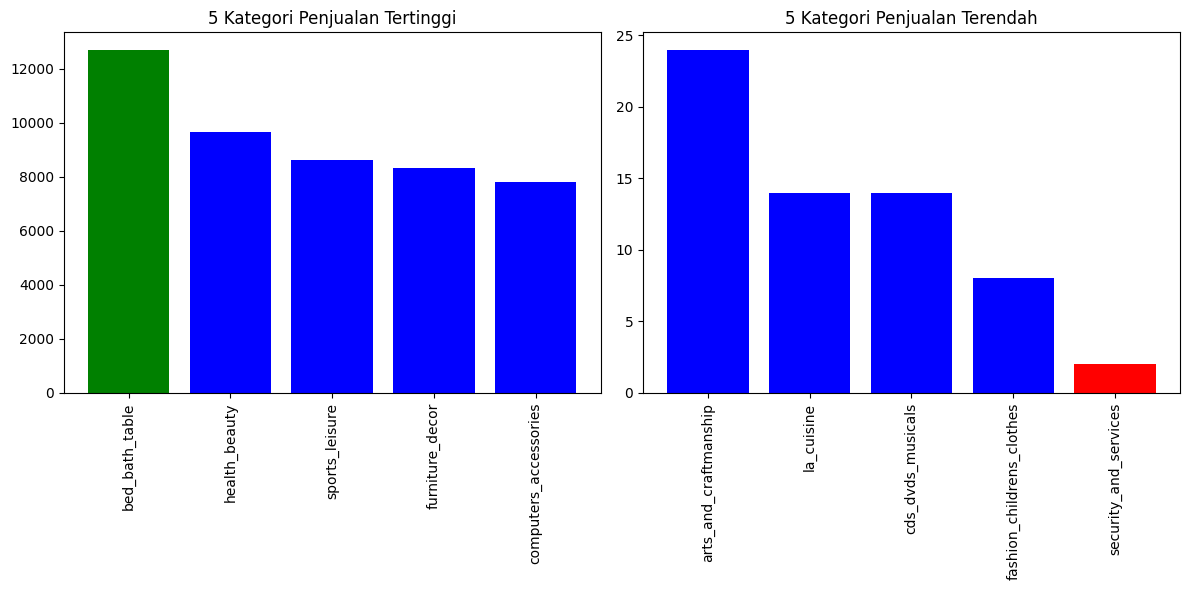

In [122]:
color1 = ['green','blue','blue','blue','blue']
color2 = ['blue','blue','blue','blue','red']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot pertama (kategori_head)
axes[0].bar(kategori_head.index, kategori_head.values, color=color1)
axes[0].set_xticks(kategori_head.index)
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_title('5 Kategori Penjualan Tertinggi')



# Plot kedua (kategori_tail)
axes[1].bar(kategori_tail.index, kategori_tail.values,color = color2)
axes[1].set_xticks(kategori_tail.index)
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_title('5 Kategori Penjualan Terendah')

    
# Menampilkan plot
plt.tight_layout()
plt.show()

**Trend Penjualan Top 5 kategori** 

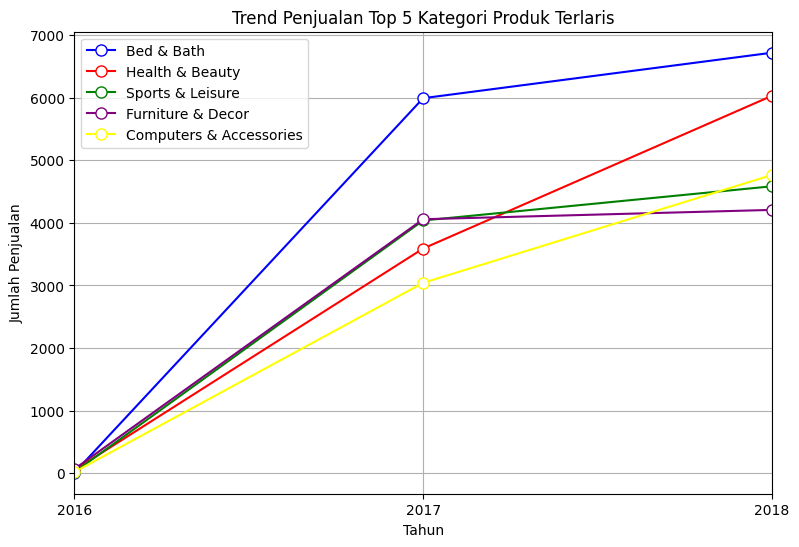

In [123]:
plt.figure(figsize=(9, 6))

# Plot kategori 1
sales_kategory1_trend.plot(kind='line', marker='o', color='blue', markerfacecolor='white', markersize=8, label='Bed & Bath')

# Plot kategori 2
sales_kategory2_trend.plot(kind='line', marker='o', color='red', markerfacecolor='white', markersize=8, label='Health & Beauty')

# Plot kategori 3
sales_kategory3_trend.plot(kind='line', marker='o', color='green', markerfacecolor='white', markersize=8, label='Sports & Leisure')

# Plot kategori 4
sales_kategory4_trend.plot(kind='line', marker='o', color='purple', markerfacecolor='white', markersize=8, label='Furniture & Decor')

# Plot kategori 5
sales_kategory5_trend.plot(kind='line', marker='o', color='yellow', markerfacecolor='white', markersize=8, label='Computers & Accessories')

plt.title('Trend Penjualan Top 5 Kategori Produk Terlaris')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.legend()  
plt.show()

### Pertanyaan 2: Grafik Pertumbuhan Penjualan

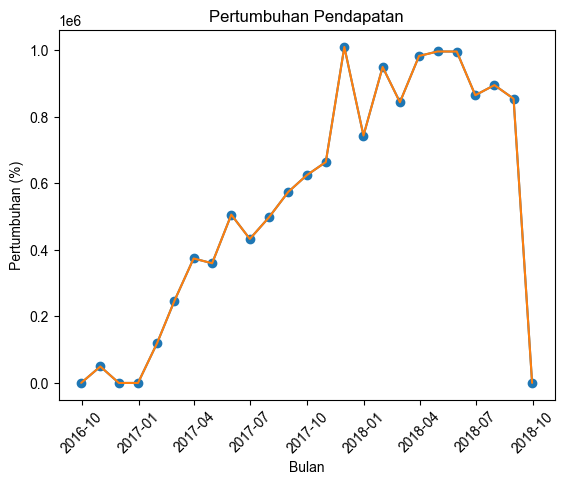

In [124]:
plt.plot(growth_month_resampled['order_purchase_timestamp'], growth_month_resampled['price'], marker='o')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(x='order_purchase_timestamp', y='price', data=growth_month_resampled)
plt.title('Pertumbuhan Pendapatan')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.ylabel('Pertumbuhan (%)')
plt.show()

### Pertanyaan 3: Berapa jumlah pesanan yang dikirim tepat waktu? lalu bandingkan dengan jumlah pesanan yang dikirim tidak tepat waktu.

In [125]:
print("")
print("Data Pengiriman Tepat Waktu")
print(filter4)


Data Pengiriman Tepat Waktu
      order_delivered_customer_date order_estimated_delivery_date
1               2018-08-07 15:27:45           2018-08-13 00:00:00
2               2018-08-17 18:06:29           2018-09-04 00:00:00
4               2018-02-16 18:17:02           2018-02-26 00:00:00
12              2018-06-19 12:05:52           2018-07-18 00:00:00
13              2018-07-30 15:52:25           2018-08-08 00:00:00
...                             ...                           ...
99428           2018-07-03 19:48:54           2018-07-23 00:00:00
99430           2018-03-13 18:54:32           2018-03-26 00:00:00
99437           2018-02-28 17:37:56           2018-03-02 00:00:00
99439           2018-01-25 23:32:54           2018-02-15 00:00:00
99440           2018-03-16 13:08:30           2018-04-03 00:00:00

[49603 rows x 2 columns]


In [126]:
print("")
print("Data Pengiriman Telat")
print(filter3)


Data Pengiriman Telat
      order_delivered_customer_date order_estimated_delivery_date
25              2018-03-21 22:03:54           2018-03-12 00:00:00
35              2018-03-20 00:59:25           2018-03-20 00:00:00
57              2018-04-03 13:28:46           2018-04-02 00:00:00
102             2018-08-03 19:28:47           2018-08-02 00:00:00
110             2018-01-23 21:38:52           2017-12-22 00:00:00
...                             ...                           ...
99328           2018-04-26 12:54:39           2018-04-25 00:00:00
99396           2018-08-21 00:03:26           2018-08-16 00:00:00
99397           2018-04-05 19:59:49           2018-04-02 00:00:00
99425           2018-04-11 00:48:31           2018-04-09 00:00:00
99432           2018-01-26 15:45:14           2018-01-18 00:00:00

[5675 rows x 2 columns]


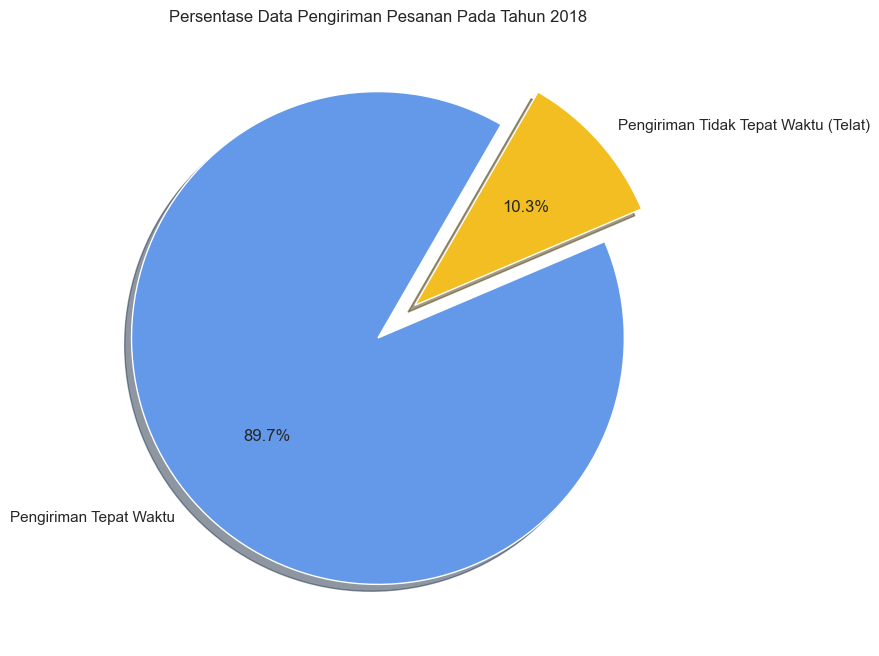

In [127]:
shipped_expose = [0,0.2]
warna = ['#6499E9','#F2BE22']
values = [49603,5675] 
labels = ['Pengiriman Tepat Waktu','Pengiriman Tidak Tepat Waktu (Telat)'] 

plt.pie(
    values, 
    labels=labels, 
    autopct='%1.1f%%',
    colors = warna,
    explode = shipped_expose,
    startangle = 60,
    shadow = True
)

plt.title("Persentase Data Pengiriman Pesanan Pada Tahun 2018")
plt.show()

### Pertanyaan 4: Kota dengan Rating tertinggi dan terendah berdasarkan jumlah penjualan atau ulasan

C:\Users\dicky\AppData\Local\Temp\ipykernel_15600\4057956806.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x="seller_city", y="review_score",palette=color,data=overall.sort_values('review_score',ascending= False),gap = 0.3)


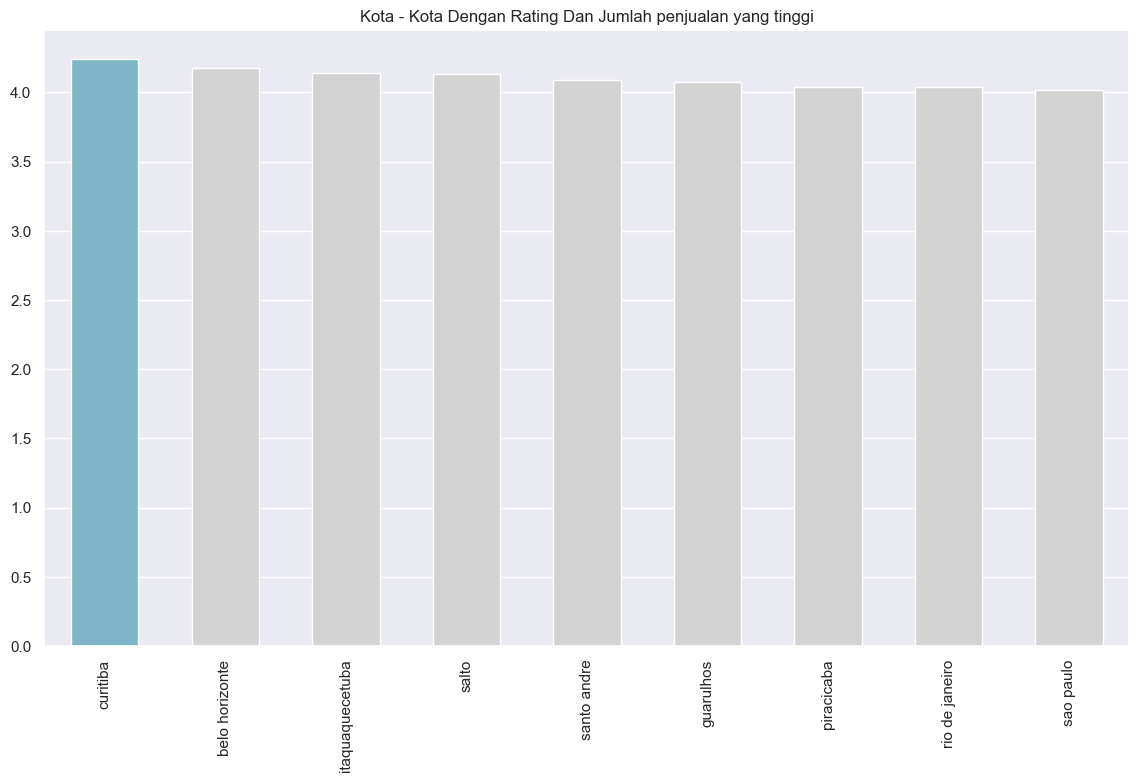

In [128]:
color =["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3","#D3D3D3"]
g = sns.barplot(x="seller_city", y="review_score",palette=color,data=overall.sort_values('review_score',ascending= False),gap = 0.3)
plt.setp(g.get_xticklabels(), rotation = 90)
g.set_title('Kota - Kota Dengan Rating Dan Jumlah penjualan yang tinggi')
plt.xlabel('')
plt.ylabel('')
plt.show()

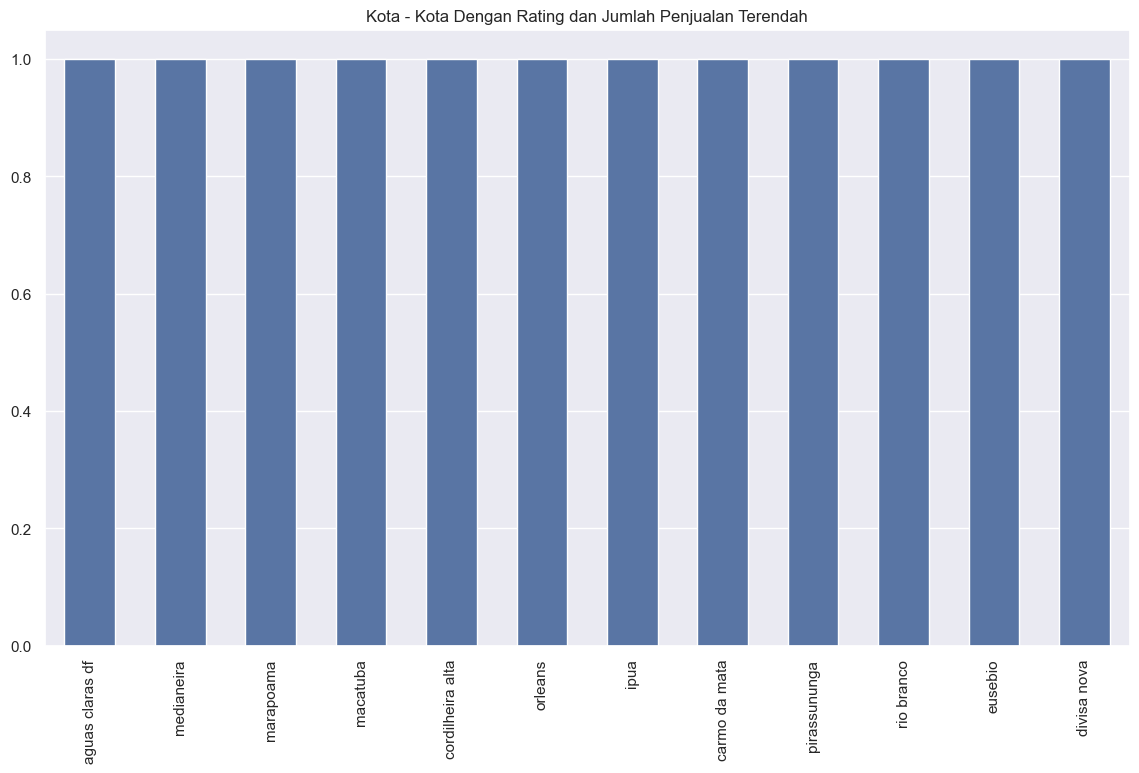

In [129]:
g2 = sns.barplot(x="seller_city", y="review_score", data=worstCity.sort_values('review_score',ascending= False),gap = 0.3)
plt.setp(g2.get_xticklabels(), rotation = 90)
g2.set_title('Kota - Kota Dengan Rating dan Jumlah Penjualan Terendah')
plt.xlabel('')
plt.ylabel('')
plt.show()

### Pertanyaan 5: Persentase Top 5 customer terbanyak dan berasal dari kota mana

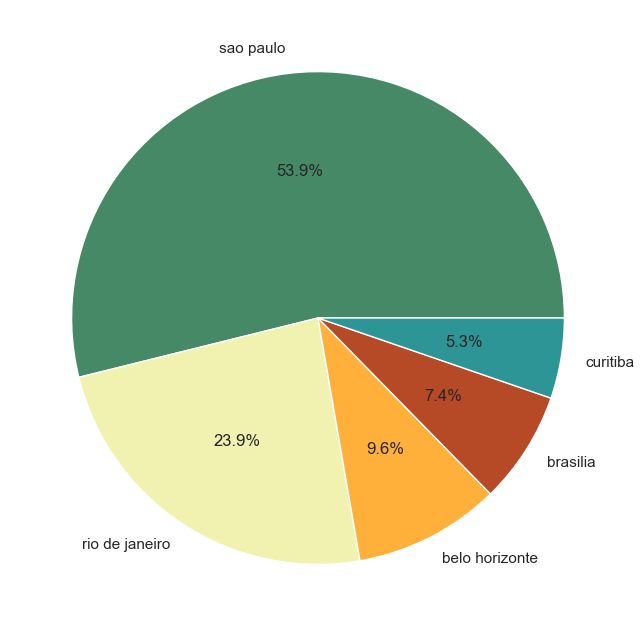

In [130]:
warna = ['#468966','#f1f1b0','#ffb03b','#b64926','#2D9596']
plt.pie(
    x = top.values,
    labels = top.index,
    autopct = '%1.1f%%',
    colors = warna
)

plt.show()

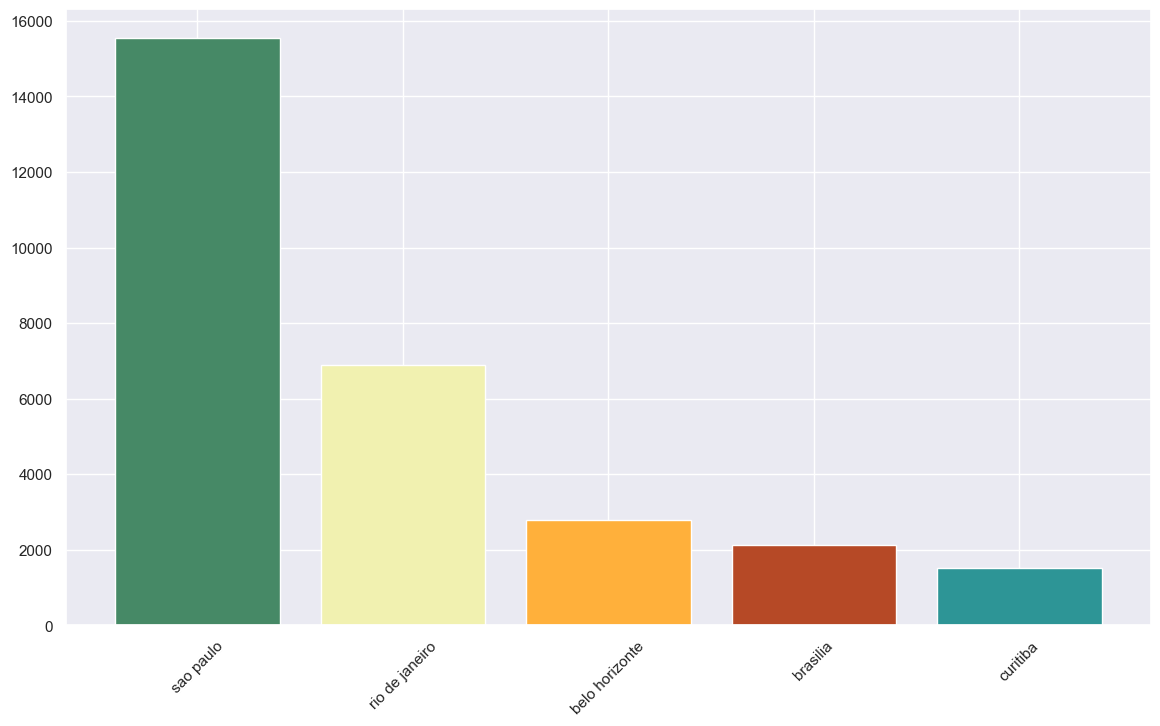

In [131]:
warna = ['#468966','#f1f1b0','#ffb03b','#b64926','#2D9596']
plt.bar(x=top.index, 
        height = top.values,
        color = warna
)
plt.xticks(rotation = 45)
plt.show()

## Conclusion

**Conclusion Pertanyaan 1** <br>
**Identifikasi 5 kategori produk dengan penjualan tertinggi dan 5 kategori produk dengan penjualan terendah. Selanjutnya, jelaskan bagaimana tren penjualan untuk 5 kategori teratas produk tersebut dalam beberapa tahun terakhir, apakah menunjukkan peningkatan, penurunan, atau stabil dalam jumlah penjualan?**
- Analisis penjualan kategori produk menunjukkan perbedaan signifikan antara kategori dengan penjualan tertinggi dan terendah. Kategori dengan penjualan tinggi seperti perabotan rumah tangga, produk kesehatan & kecantikan, dan perlengkapan olahraga menunjukkan minat kuat dari pelanggan dan memiliki posisi kuat di pasar. 5 Kategori teratas semakin populer di kalangan konsumen seiring berjalannya waktu. Oleh karena itu, perusahaan dapat mempertimbangkan untuk meningkatkan stok produk dalam kategori ini atau mencari cara untuk memaksimalkan penjualan, seperti dengan menjalankan promosi atau diskon khusus.

- Sebaliknya, kategori dengan penjualan rendah seperti seni & kerajinan, hiburan seperti CD & DVD, dan produk keamanan & layanan menunjukkan kurangnya minat konsumen. Strategi penjualan perlu ditingkatkan untuk kategori ini, termasuk melakukan kampanye pemasaran yang lebih agresif, melakukan riset pasar dan perluas variasi produk, serta meninjau kembali stok produk. Dengan strategi ini, perusahaan dapat meningkatkan daya saingnya, meningkatkan pendapatan, dan memperkuat posisi di pasar.

**Conclusion Pertanyaan 2** <br>
**Grafik Pertumbuhan Penjualan**
- Pertumbuhan pendapatan cukup signifikan berubah-ubah, namun jika dilihat lebih detail terdapat pola dari bulan Januari 2017 hingga Desembar 2017 pertumbuhan pendapatan mulai mengalami stagnasi. Jika ini dibiarkan lebih lanjut, maka akan berpotensi mengalami penurunan seperti yang terlihat pada grafik bulan September 2018 menuju bulan Oktober 2018.  perusahaan perlu membuat strategi bisnis dan marketing secepatnya mengingat pertumbuhan pendapatan yang mengalami penurunan dibandingkan awal tahun 2017, jika dibiarkan kemungkinan perusahaan akan mengalami kerugian di tahun mendatang.

- Strategi bisnis dan marketing perlu dilakukan dengan memerhatikan beberapa faktor, salah satunya sumber daya yang perusahaan punya. Oleh sebab itu, dengan menganalisis kota yang memiliki sales tertinggi, atau menganalisis segmentasi customer bisa menjadi acuan yang sangat penting dalam memulai strategi tersebut.

**Conclusion Pertanyaan 3** <br>
**Berapa perbandingan jumlah pesanan yang dikirim tepat waktu dan jumlah pesanan yang dikirim tidak tepat waktu pada tahun 2018?**
- Pengiriman pesanan tepat waktu merupakan kunci keberhasilan dalam memenuhi harapan pelanggan, meningkatkan kepercayaan, dan membangun reputasi bisnis yang baik. Di sisi lain, keterlambatan pengiriman dapat merugikan pelanggan, merusak citra perusahaan atau toko, dan berpotensi menimbulkan kerugian finansial dan rating toko. 
- Data di atas menunjukkan bahwa rata-rata pesanan dikirim tepat waktu dengan persentase(89.73%), akan tetapi pesanan yang dikirim tidak tepat waktu (telat) juga memiliki persentase yang bisa dibilang cukup besar (10.27%). Maka dari itu, data ini dapat digunakan oleh perusahaan guna meningkatkan kualitas pengiriman pesanan sehingga dapat berkurang persentasenya.

**Conclusion Pertanyaan 4** <br>
**Kota dengan Rating tertinggi dan terendah berdasarkan jumlah penjualan atau ulasan** <br>
nalisis terkait kota-kota dengan rating tertinggi dan terendah berdasarkan jumlah ulasan dari berbagai konsumen, mengeluarkan hasil-hasil sebagai berikut:<br>
- Kota - kota seperti sao paulo, curitiba, salto, dll memiliki rating dengan tingkat dan ulasan yang sangat tinggi. Artinya, seller - seller yang berada di kota-kota tersebut memiliki kualitas yang sangat baik dari segi pelayanan, produk yang ditawarkan, ataupun aspek lainnya yang mendukung poin poin di atas.<br>

- Sebaliknya, kota - kota seperti aguas claras df, medianeira, marapoama, dll memiliki rating dengan tingkat penjualan dan ulasan yang sangat rendah. Kota - kota tersebut perlu adanya peningkatan dalam aspek kualitas dan pelayanan, agar dapat meningkatkan kepuasan konsumen terhadap produk atau seller dari kota - kota tersebut.

**Conclusion Pertanyaan 5** <br>
**Persentase Top 5 customer terbanyak dan berasal dari kota mana?** <br>Data  tersebut menunjukan persentase 5 kota dengan customer terbanyak yaitu berada di kota: sao paulo, rio de janeiro, belo horizonte, brasilia, curtibia. Maka dari itu, data tersebut dapat digunakan untuk menerapkan beberapa strategi diantaranya :
- Menjaga kepuasan customer dan meningkatkan layanan customer <br>
  karena Lima kota dengan customer terbanyak memberikan kontribusi signifikan terhadap total persentase customer e-commerce, dengan menjaga kepuasan customer dan meningkatkan pelayanan memungkinkan jumlah customer meningkat.M
- meningkatkan potensi pertumbuhan di luar kota dengan customer terbanyak <br>
  Meskipun fokus utama mungkin pada lima kota teratas, analisis juga harus mempertimbangkan potensi pertumbuhan di kota-kota lain. Mengetahui tren dan kebutuhan konsumen di kota-kota tersebut dapat membuka peluang untuk meningkatkan strategi yang sama dengan stategi di 5 kota terbesar.